<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E4%BD%BF%E7%94%A8SVM%E4%B8%ADSVR%E5%AF%B9%E6%B3%A2%E5%A3%AB%E9%A1%BF%E6%88%BF%E4%BB%B7%E9%A2%84%E6%B5%8B%EF%BC%8C%E7%86%9F%E6%82%89SVM%E7%9A%84%E5%9B%9E%E5%BD%92%E9%97%AE%E9%A2%98%E5%BA%94%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [2]:
def notEmpty(s):
    return s != ''

In [9]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "boston_housing.data"
fd = pd.read_csv(path,header=None)
data = np.empty((len(fd),14))

for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

## 分割数据
x, y = np.split(data, (13,), axis=1)
y = y.ravel() # 转换格式

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [10]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
## 模型构建（参数类型和SVC基本一样）
parameters = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 0.5],
    'gamma': [0.0001, 0.0005]
}
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5], 'gamma': [0.0001, 0.0005],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
## 获取最优参数
print ("最优参数列表:", model.best_params_)
print ("最优模型:", model.best_estimator_)
print ("最优准确率:", model.best_score_)

最优参数列表: {'C': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}
最优模型: SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
最优准确率: 0.7369296755239203


In [13]:
## 模型效果输出
print ("训练集准确率:%.2f%%" % (model.score(x_train, y_train) * 100))
print ("测试集准确率:%.2f%%" % (model.score(x_test, y_test) * 100))

训练集准确率:74.88%
测试集准确率:51.82%


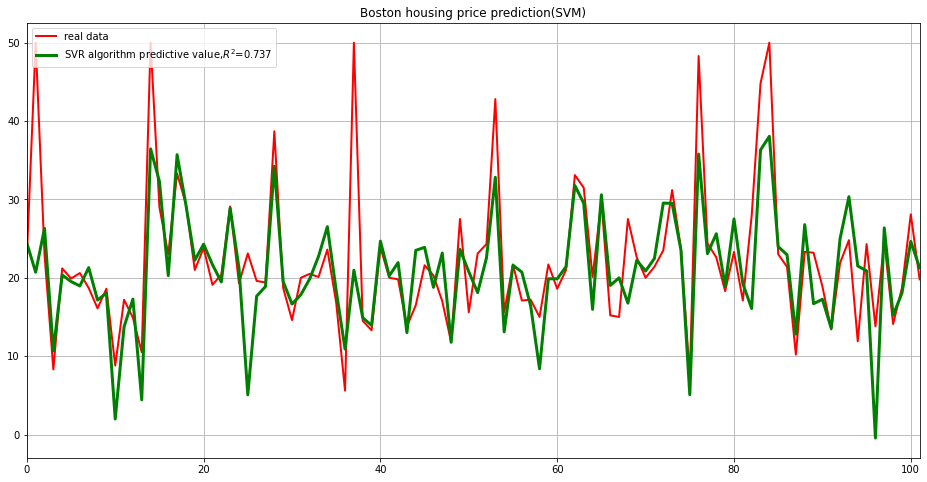

In [14]:
## 画图
colors = ['g-', 'b-']
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

plt.figure(figsize=(16,8), facecolor='w')
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'real data')
plt.plot(ln_x_test, y_predict, 'g-', lw = 3, label=u'SVR algorithm predictive value,$R^2$=%.3f' % (model.best_score_))

# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"Boston housing price prediction(SVM)")
plt.xlim(0, 101)
plt.show()